In [355]:
from sklearn.linear_model import ElasticNet, Lasso,BayesianRidge, LassoLarsIC, LinearRegression, RidgeCV, \
LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pylab 
import scipy.stats as stats
import warnings
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

pd.options.display.max_columns = None

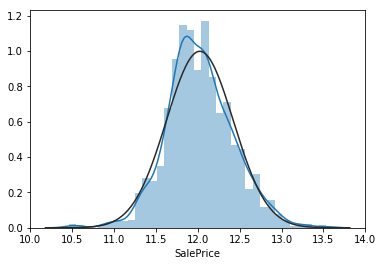

In [356]:
###Remove outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4500) & \
                                  (df_train['SalePrice']<300000)].index)

### Normalize sale price 
df_train["SalePrice"] = np.log(df_train["SalePrice"])
sns.distplot(df_train['SalePrice'] , fit=norm);

### Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

####Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(df_train['SalePrice'], plot=plt)
# plt.show()

In [357]:
### Replace NA's with None or median 
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")
df_train["Alley"] = df_train["Alley"].fillna("None")
df_train["Fence"] = df_train["Fence"].fillna("None")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

df_train["GarageType"] = df_train["GarageType"].fillna("None")
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")

df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")

df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["Electrical"] = df_train["Electrical"].fillna("None")

df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna("None")

df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [358]:
### Replace NA's with None or median 
df_test["PoolQC"] = df_test["PoolQC"].fillna("None")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("None")
df_test["Alley"] = df_test["Alley"].fillna("None")
df_test["Fence"] = df_test["Fence"].fillna("None")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("None")

df_test["GarageType"] = df_test["GarageType"].fillna("None")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("None")
df_test["GarageQual"] = df_test["GarageQual"].fillna("None")
df_test["GarageCond"] = df_test["GarageCond"].fillna("None")

df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna("None")
df_test["BsmtExposure"] = df_test["BsmtExposure"].fillna("None")
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna("None")
df_test["BsmtCond"] = df_test["BsmtCond"].fillna("None")
df_test["BsmtQual"] = df_test["BsmtQual"].fillna("None")

df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["Electrical"] = df_test["Electrical"].fillna("None")

df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna("None")

df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [359]:
###Add total square footage
df_train['TotalSF']=df_train['TotalBsmtSF']+df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalBath'] = df_train['FullBath'] + df_train['BsmtFullBath'] + 0.5*df_train['HalfBath'] + \
0.5*df_train['BsmtHalfBath']

#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

### Nominal to Numerical
df_train['ExterQual']=df_train['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['ExterCond']=df_train['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtQual']=df_train['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtCond']=df_train['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['BsmtExposure']=df_train['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_train['BsmtFinType1']=df_train['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['BsmtFinType2']=df_train['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_train['HeatingQC']=df_train['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['KitchenQual']=df_train['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['FireplaceQu']=df_train['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageQual']=df_train['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['GarageCond']=df_train['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_train['PoolQC']=df_train['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_train['Fence']=df_train['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})


In [360]:
###Add total square footage
df_test['TotalSF']=df_test['TotalBsmtSF']+df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['TotalBath'] = df_test['FullBath'] + df_test['BsmtFullBath'] + 0.5*df_test['HalfBath'] + \
0.5*df_test['BsmtHalfBath']

#MSSubClass=The building class
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
#Changing OverallCond into a categorical variable
df_test['OverallCond'] = df_test['OverallCond'].astype(str)
#Year and month sold are transformed into categorical features.
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

### Nominal to Numerical
df_test['ExterQual']=df_test['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['ExterCond']=df_test['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtQual']=df_test['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtCond']=df_test['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['BsmtExposure']=df_test['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})
df_test['BsmtFinType1']=df_test['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_test['BsmtFinType2']=df_test['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})
df_test['HeatingQC']=df_test['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['KitchenQual']=df_test['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['FireplaceQu']=df_test['FireplaceQu'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['GarageQual']=df_test['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['GarageCond']=df_test['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})
df_test['PoolQC']=df_test['PoolQC'].map({'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'None':0})
df_test['Fence']=df_test['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})



In [361]:
df_train.shape

(1458, 83)

In [362]:
### Drop Id and Utilities column 
df_train = df_train.drop(['Id', 'Utilities'], axis = 1)
df_train = df_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
                          'FullBath','BsmtFullBath','HalfBath', \
                          'BsmtHalfBath','MasVnrArea'], axis=1)

In [363]:
df_train.shape

(1458, 73)

In [364]:
df_test.shape

(1459, 82)

In [365]:
submission=pd.DataFrame()
submission['Id']=df_test.Id

In [366]:
### Drop unnecessary columns
df_test = df_test.drop(['Id','Utilities'], axis = 1)
df_test = df_test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
                          'FullBath','BsmtFullBath','HalfBath', \
                          'BsmtHalfBath','MasVnrArea'], axis=1)

In [367]:
df_test.shape

(1459, 72)

In [368]:
### Define sale price and features of houses 
sale_price = df_train['SalePrice']
house_features3 = df_train.drop('SalePrice', axis = 1)

In [369]:
from scipy.stats import skew
numeric_feats = house_features3.dtypes[house_features3.dtypes != "object"].index
skewed_feats = house_features3[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,24.43
PoolQC,18.66
PoolArea,15.93
LotArea,12.56
3SsnPorch,10.29
LowQualFinSF,9.00
KitchenAbvGr,4.48
BsmtFinSF2,4.25
ScreenPorch,4.11
BsmtFinType2,3.29


In [370]:
skewness = skewness[abs(skewness)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
#     house_features3[feat] += 1
    house_features3[feat] = boxcox1p(house_features3[feat], lam)
    df_test[feat] = boxcox1p(df_test[feat], lam)
# house_features3[skewed_features] = np.log1p(house_features3[skewed_features])


      

There are 40 skewed numerical features to Box Cox transform


In [371]:
print(house_features3.shape)
print(df_test.shape)

(1458, 72)
(1459, 72)


In [372]:
house_features3['train'] = 1
df_test['train'] = 0
comb = pd.concat([house_features3,df_test], sort=False)

In [373]:
print("Train: ", house_features3.shape)
print("Test: ", df_test.shape)
comb = pd.get_dummies(comb)
house_features3 = comb[comb["train"] == 1]
df_test = comb[comb["train"] == 0]
print("\n")
print("Train: ", house_features3.shape)
print("Test: ", df_test.shape)

Train:  (1458, 73)
Test:  (1459, 73)


Train:  (1458, 273)
Test:  (1459, 273)


In [374]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBath
0,60,RL,65.00,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,1,6,706,1,0,150,GasA,5,Y,SBrkr,0,1710,3,1,4,8,Typ,0,0,Attchd,2003.00,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,0,None,0,2,2008,WD,Normal,12.25,2566,3.50
1,20,RL,80.00,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,3,3,CBlock,4,3,4,5,978,1,0,284,GasA,5,Y,SBrkr,0,1262,3,1,3,6,Typ,1,3,Attchd,1976.00,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,0,None,0,5,2007,WD,Normal,12.11,2524,2.50
2,60,RL,68.00,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,2,6,486,1,0,434,GasA,5,Y,SBrkr,0,1786,3,1,4,6,Typ,1,3,Attchd,2001.00,RFn,2,608,3,3,Y,0,42,0,0,0,0,0,0,None,0,9,2008,WD,Normal,12.32,2706,3.50
3,70,RL,60.00,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,3,3,BrkTil,3,4,1,5,216,1,0,540,GasA,4,Y,SBrkr,0,1717,3,1,4,7,Typ,1,4,Detchd,1998.00,Unf,3,642,3,3,Y,0,35,272,0,0,0,0,0,None,0,2,2006,WD,Abnorml,11.85,2473,2.00
4,60,RL,84.00,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,4,3,PConc,4,3,3,6,655,1,0,490,GasA,5,Y,SBrkr,0,2198,4,1,4,9,Typ,1,3,Attchd,2000.00,RFn,3,836,3,3,Y,192,84,0,0,0,0,0,0,None,0,12,2008,WD,Normal,12.43,3343,3.50


In [375]:
### Dummify 
house_features3 = pd.get_dummies(house_features3)
df_test = pd.get_dummies(df_test)

In [376]:
house_features3.shape

(1458, 273)

In [377]:
df_test.shape

(1459, 273)

In [378]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split \
(house_features3, sale_price, test_size=0.2, random_state=111)

## 1. Multiple Linear Regression 

In [379]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print('R^2 is equal to %.3f' %(lm.score(x_train, y_train)))
print('RSS is equal to %.3f' %(np.sum((y_train-lm.predict(x_train))**2)))
print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))
print('The model score is %.3f' %(lm.score(x_train, y_train)))
print()

trainRMSE = np.sqrt(mean_squared_error(y_train, lm.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, lm.predict(x_test)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

# print(pd.Series(lm.coef_, index=x_train.columns).sort_values(ascending=False))

R^2 is equal to 0.955
RSS is equal to 8.393
The intercept is 0.037
The model score is 0.955

Train RMSE: 0.085
Test RMSE: 0.138
Diff in RMSE: 0.053


## 2. Ridge

In [380]:
#ridgcv = RidgeCV(alphas=np.linspace(1e-5,1e-4,1e-3,1e-2))
ridgcv = RidgeCV(alphas=[.001, .01, .1, 1, 2, 5, 10, 12, 14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
ridgcv.fit(x_train,y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=ridgcv.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=ridgcv.predict(x_test)))

print('The best alpha is %.6f' %(ridgcv.alpha_))
print('The ridge intercept is %.2f' %(ridgcv.intercept_))
# print(pd.Series(abs(ridgcv.coef_), index=x_train.columns).sort_values())
print('The model score is: %.2f' %(ridgcv.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The best alpha is 10.000000
The ridge intercept is 1.38
The model score is: 0.95
Train RMSE: 0.092
Test RMSE: 0.124
Diff in RMSE: 0.032


## 3. Lasso

In [381]:
# lassocv = LassoCV(alphas=np.linspace(0,20,100), normalize=False,
#                       max_iter=10000, n_jobs=-1, cv=100)
lassocv = LassoCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
lassocv.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, lassocv.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test,lassocv.predict(x_test)))

print('The best alpha is: %.6f' %(lassocv.alpha_))
print('The lasso intercept is: %.2f' %(lassocv.intercept_))
# print(pd.Series(lassocv.coef_, index=x_train.columns))
print('The model score is: %.2f' %(lassocv.score(x_train, y_train)))

print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE)) 
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The best alpha is: 0.001000
The lasso intercept is: 0.46
The model score is: 0.94
Train RMSE: 0.101
Test RMSE: 0.124
Diff in RMSE: 0.022


## 4. ElasticNet

In [382]:
# enet = ElasticNetCV(l1_ratio=np.linspace(0.01,1,100), alphas=np.linspace(1e-5,20,1000), max_iter=1000, normalize=False, cv=10, n_jobs=-1)
enet = ElasticNetCV(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
                          14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
enet.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_true=y_train, y_pred=enet.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_true=y_test, y_pred=enet.predict(x_test)))

print('The best alpha is %.6f' %(enet.alpha_)) 
print('The elastic-net intercept is %.2f' %(enet.intercept_))
print('The model score is %.2f' %(enet.score(x_train, y_train)))
# print(pd.Series(enet.coef_, index=x_train.columns))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.2f' %((testRMSE - trainRMSE)))

The best alpha is 0.001000
The elastic-net intercept is 1.02
The model score is 0.94
Train RMSE: 0.096
Test RMSE: 0.122
Diff in RMSE: 0.03


## 5. Random Forest

In [383]:
rf = RandomForestRegressor(n_estimators=1000,max_depth=10,max_features=0.5, \
                           min_samples_split=2, min_samples_leaf=1,n_jobs=-1, \
                           random_state=111)
# rf = RandomForestRegressor(alphas=[.000001, .00001, .0001, .001, .01, .1, 1, 2, 5, 10, 12, \
#                           14, 15, 17, 20, 25, 30, 40, 50, 100, 200, 500])
#rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight=(1:0.4, 0:0.6), n_jobs=-1) #alternate
rf.fit(x_train, y_train)
scores = cross_val_score(rf, x_train, y_train, cv=10)
print(scores.mean())

trainRMSE = np.sqrt(mean_squared_error(y_train, rf.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, rf.predict(x_test)))

print('The model score is %.2f' %(rf.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE) )
print('Diff in RMSE: %.3f' %((testRMSE - trainRMSE)))

0.8894357908932717
The model score is 0.98
Train RMSE: 0.057
Test RMSE: 0.139
Diff in RMSE: 0.082


## 6. Gradient Boosting

In [384]:
gbst = GradientBoostingRegressor(alpha=0.2, n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =111)

n_estimators = 50100
gbst.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbst.fit(x_train, y_train)

trainRMSE = np.sqrt(mean_squared_error(y_train, gbst.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, gbst.predict(x_test)))

# print('The best alpha is %.6f' %(gbst.alpha_)) 
print('The model score is %.2f' %(gbst.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.95
Train RMSE: 0.086
Test RMSE: 0.188
Diff in RMSE: 0.102


## 7. Xgboost

In [385]:
import xgboost
### Initial Pass
xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=10.5, reg_lambda=0.3, gamma=0.01,
                           silent=1, random_state =7, nthread = -1) 
xgb.fit(x_train, y_train, verbose=False)
### Make Predictions 
trainRMSE = np.sqrt(mean_squared_error(y_train, xgb.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, xgb.predict(x_test)))

print('The model score is %.2f' %(xgb.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.90
Train RMSE: 0.129
Test RMSE: 0.140
Diff in RMSE: 0.010


## 8. Lightgbm

In [386]:
from lightgbm import LGBMRegressor
import lightgbm 
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.001, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
lgb.fit(x_train, y_train)


trainRMSE = np.sqrt(mean_squared_error(y_train, lgb.predict(x_train)))
testRMSE = np.sqrt(mean_squared_error(y_test, lgb.predict(x_test)))

print('The model score is %.3f' %(lgb.score(x_train, y_train)))
print('Train RMSE: %.3f' %(trainRMSE))
print('Test RMSE: %.3f' %(testRMSE))
print('Diff in RMSE: %.3f' %(testRMSE-trainRMSE))

The model score is 0.545
Train RMSE: 0.270
Test RMSE: 0.270
Diff in RMSE: 0.000


## Submission 

In [387]:
print(house_features3.shape)
print(df_test.shape)

(1458, 273)
(1459, 273)


In [388]:
df_test = df_test.select_dtypes(include=[np.number]).interpolate().dropna()
predictions = enet.predict(df_test)

In [389]:
pd.options.display.float_format = '{:.2f}'.format
#submission['SalePrice'] = np.expm1(predictions)
submission['SalePrice'] = np.exp(predictions)
submission

,Id,SalePrice
0,1461,121217.40
1,1462,155825.20
2,1463,184173.23
3,1464,202749.57
4,1465,192513.65
5,1466,170922.10
6,1467,180593.22
7,1468,160830.73
8,1469,194264.27
9,1470,119134.50


In [391]:
submission.to_csv('submission1.csv', index=False)
